# Vorlesung 4: Algorithmische Wissenschaftstheorie, Gerd Graßhoff
## Epistemische Ausdrücke
Ziele und Funde

# Vorbereitung

In [2]:
# Loading packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading Nasa abstracts
dfExoplanetsNASA = pd.read_json('./data/dfExoplanetsNASA_v2.json', orient = 'table')
dfExoplanetsNASA = dfExoplanetsNASA[dfExoplanetsNASA.abstract != 'None'].reset_index(drop=True)

# Analyse

In [4]:
len(dfExoplanetsNASA)

29745

In [5]:
dfExoplanetsNASA.head()

,bibcode,DOI,authors,affiliation,acknowledgements,grant,published,year,title,abstract,keywords,citation_count
0,2019NewA...70....1B,10.1016/j.newast.2018.12.005,"[Zhang Bin, Qian Sheng-Bang, Liu Nian-Ping, Zh...","[School of Physics and Electronic Science, Gui...",We thank the anonymous referee for useful comm...,[],2019-07-00,2019,First photometric study of a short-period deta...,NSVS 10441882 is a newly discovered eclipsing ...,"[Binary, Eclipsing binary, Light curve, Orbita...",0
1,2019CNSNS..71...82A,10.1016/j.cnsns.2018.10.026,"[M. Alvarez-Ramírez, E. Barrabés, M. Medina, M...","[Dept. de Matemáticas, UAM-Iztapalapa, Ciudad ...",E. Barrabs has been supported by grants MTM201...,[],2019-06-00,2019,Ejection-Collision orbits in the symmetric col...,"In this paper, we consider the collinear symme...","[Collinear four-body problem, Ejection/collisi...",0
2,2019NewA...69...27E,10.1016/j.newast.2018.11.008,"[Şeyda Enez, Hasan Ali Dal]","[Ege University, Department of Astronomy and S...",We wish to thank the Turkish Scientific and Te...,[],2019-05-00,2019,Cool spot migration and flare activity of KIC ...,Analysing the photometrical data taken from th...,"[Techniques: Photometric, Methods: Statistical...",0
3,2019MNRAS.483.3465F,10.1093/mnras/sty3367,[Giacomo Fragione],"[Racah Institute for Physics, The Hebrew Unive...",Author thanks Nader Haghighipour for useful an...,[],2019-03-00,2019,Dynamical origin of S-type planets in close bi...,Understanding the origin of planets that have ...,"[planets and satellites: general, binaries: cl...",0
4,2019MNRAS.483.3448M,10.1093/mnras/sty3346,"[Kristina Monsch, Barbara Ercolano, Giovanni P...","[Universitäts-Sternwarte, Ludwig-Maximilians-U...",We thank Giovanni Rosotti and Jeff Jennings fo...,[],2019-03-00,2019,The imprint of X-ray photoevaporation of plane...,High-energy radiation from a planet host star ...,"[planets and satellites: formation, planet-dis...",0


## Select columns

In [6]:
dfExoplanets = dfExoplanetsNASA[['title', 'year', 'abstract']]

In [7]:
dfExoplanets.head()

,title,year,abstract
0,First photometric study of a short-period deta...,2019,NSVS 10441882 is a newly discovered eclipsing ...
1,Ejection-Collision orbits in the symmetric col...,2019,"In this paper, we consider the collinear symme..."
2,Cool spot migration and flare activity of KIC ...,2019,Analysing the photometrical data taken from th...
3,Dynamical origin of S-type planets in close bi...,2019,Understanding the origin of planets that have ...
4,The imprint of X-ray photoevaporation of plane...,2019,High-energy radiation from a planet host star ...


# Select items

In [8]:
dfExoplanets.iloc[2]

title       Cool spot migration and flare activity of KIC ...
year                                                     2019
abstract    Analysing the photometrical data taken from th...
Name: 2, dtype: object

In [9]:
dfExoplanets['abstract'].iloc[2]

'Analysing the photometrical data taken from the Kepler Mission Database, the results obtained from both the One Phase Exponential Association model derived for the flare activity and the spot migration on the surface of eclipsing binary system KIC 11560447 are presented. A sinusoidal variation due to the rotation modulation is defined. There are two cool spots separated by about 100° longitudinally. It is seen that the parameters of these spotted areas such as radii, latitudes and longitudes, were varying during observing seasons. Apart from the cool spots, flare activity is also detected on the target, and 226 flares were determined with their parameters. Modelling the distribution of flare equivalent durations versus the flare total times, the Plateau parameter was found to be 1.4114 ± 0.1712 s in the logarithmic scale, while the Half-time value was found to be 2394.03 s. The frequency of flare N<SUB>1</SUB>, which is the number of flares per an hour in the system, was computed as 0

# Search for expressions

In [10]:
suchwort="know"
filtAbst=dfExoplanets['abstract'].str.contains(suchwort)
dfS=dfExoplanets[filtAbst]
len(dfS)

5833

In [11]:
def filt(S):
    doesC=dfExoplanets['abstract'].str.contains(S)
    return(doesC)

In [12]:
dfS=dfExoplanets[filt(suchwort)]
len(dfS)

5833

In [13]:
c1=Counter(dfExoplanets["abstract"].str.contains(suchwort))
c1

Counter({False: 23912, True: 5833})

In [14]:
dfExoplanets["count"]=dfExoplanets["abstract"].str.count(suchwort,re.I)

In [15]:
dfExoplanets.sort_values(by=["count"],ascending=False)

,title,year,abstract,count
22545,Unknowns and unknown unknowns: from dark sky t...,2010,Answering well-known fundamental questions is ...,12
29161,Astrobiology - The New Synthesis,2002,Background In connection with the complex plan...,11
28639,Glowing Hot Transiting Exoplanet Discovered,2003,VLT Spectra Indicate Shortest-Known-Period Pla...,9
3949,The RECONS 10 Parsec Sample,2018,"The sample of stars, brown dwarfs, and exoplan...",7
19943,The Instellation Habitable Zone: Liquid Water ...,2011,The habitable zone is the region around a star...,7
27811,Undercover Stars Among Exoplanet Candidates,2005,Very Large Telescope Finds Planet-Sized Transi...,7
28254,Two Extremely Hot Exoplanets Caught in Transit,2004,VLT Measures Properties of New Jupiter-Size Ob...,7
29271,Sounds of a Star,2001,"Acoustic Oscillations in Solar-Twin ""Alpha Cen...",7
29409,Youngest Brown Dwarf Yet in a Multiple Stellar...,2000,... and the Sharpest Optical Image (0.18 arcse...,7
10040,A strict epistemic approach to physics,2016,The general view is that all fundamental physi...,7


In [16]:
dfExoplanets['abstract'].iloc[19]

'We investigate the role that planet detection order plays in the Kepler planet detection pipeline. The Kepler pipeline typically detects planets in order of descending signal strength (MES). We find that the detectability of transits experiences an additional 5.5 per cent and 15.9 per cent efficiency loss, for periods &lt;200 days and &gt;200 days respectively, when detected after the strongest signal transit in a multiple-planet system. We provide a method for determining the transit probability for multiple-planet systems by marginalizing over the empirical Kepler dataset. Furthermore, because detection efficiency appears to be a function of detection order, we discuss the sorting statistics that affect the radius and period distributions of each detection order. Our occurrence rate dataset includes radius measurement updates from the California Kepler Survey (CKS), Gaia DR2, and asteroseismology. Our population model is consistent with the results of Burke et al. (2015), but now in

In [17]:
abstract=str(dfS['abstract'].iloc[35])
abstract

'The abundance of planets with orbital periods of a few to tens of days suggests that exoplanets experience complex dynamical histories. Planets in young stellar clusters or associations have well-constrained ages and therefore provide an opportunity to explore the dynamical evolution of exoplanets. K2-25b is a Neptune-sized planet in an eccentric 3.48 day orbit about an M4.5 dwarf star in the Hyades cluster (650 Myr) and is the most accessible transiting planet in a cluster to date. In order to investigate its non-zero eccentricity and tight orbit, we analyze transit timing variations (TTVs) which may reveal clues to the migration processes that may have acted on the planet. We obtained 21 non-consecutive nights of photometric data from the MEarth and Spitzer telescopes, and additionally analyze long-cadence data from K2. Each transit lightcurve is fit individually to investigate whether inhomogeneities on the stellar surface (such as spots or plages) are differentially affecting our 

In [18]:
suchgruppe=["detect","discover","find"]
suchbegriff="FALSE"
for i in suchgruppe:
    suchbegriff=suchbegriff+"|"+i
suchbegriff

'FALSE|detect|discover|find'

In [19]:
dfExoplanets["count"]=dfExoplanets["abstract"].str.count(suchbegriff,re.I)

In [20]:
dfExoplanets.sort_values(by=["count"],ascending=False)

,title,year,abstract,count
12471,The Kepler False Positive Table,2015,The Kepler Space Telescope has detected thousa...,22
9035,AAS 228: Day 3 morning,2016,Editors Note:This week were at the 228th AAS M...,20
28152,Fourteen Times the Earth,2004,ESO HARPS Instrument Discovers Smallest Ever E...,18
28254,Two Extremely Hot Exoplanets Caught in Transit,2004,VLT Measures Properties of New Jupiter-Size Ob...,17
15606,Searching for transits in the WTS with the dif...,2013,The search for exo-planets is currently one of...,17
29292,Exoplanets: The Hunt Continues!,2001,Swiss Telescope at La Silla Very Successful Su...,17
11600,Robust high-contrast companion detection from ...,2015,Context. Long-baseline interferometry is an im...,16
23700,32 New Exoplanets Found,2009,"oday, at an international ESO/CAUP exoplanet c...",16
10122,Disk Detective Follow-Up Program,2016,As new data on exoplanets and young stellar as...,16
29430,Exoplanets Galore!,2000,Eight New Very Low-Mass Companions to Solar-Ty...,16


# Filter

In [21]:
filtYear= dfExoplanets['year']<2016
dfExoplanets[filtYear].head(2)

,title,year,abstract,count
10224,Ktransit 0.2.2,2015,A simple exoplanet transit modeling tool in py...,0
10225,Spitzer IRAC Photometry for Time Series in Cro...,2015,We develop a new photometry algorithm that is ...,0


# Groups

In [22]:
dfYear=dfExoplanets.groupby("year").size().reset_index(name="counts")
dfYear.tail(5)

,year,counts
38,2015,2629
39,2016,2851
40,2017,2866
41,2018,3930
42,2019,577


In [23]:
dfYear=dfYear.drop(42)

# Visualisation

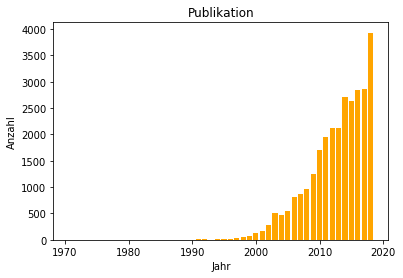

In [24]:
plt.bar(dfYear["year"],dfYear["counts"], color='orange')
plt.xlabel("Jahr")
plt.ylabel("Anzahl")
plt.title('Publikation')
plt.show()

In [25]:
dfYear2=dfS.groupby("year").size().reset_index(name="counts")
dfYear2=dfYear2.drop(22)
dfYear2.tail(5)

,year,counts
23,2015,504
24,2016,535
25,2017,525
26,2018,720
27,2019,115


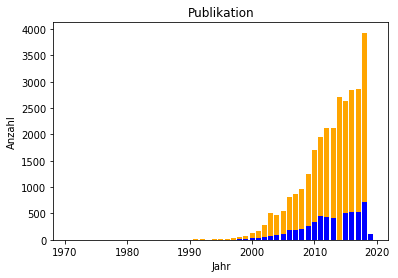

In [26]:
plt.bar(dfYear["year"],dfYear["counts"], color='orange')
plt.bar(dfYear2["year"],dfYear2["counts"], color='blue')
plt.xlabel("Jahr")
plt.ylabel("Anzahl")
plt.title('Publikation')
plt.show()

In [29]:
dfExoplanetsNASA.to_pickle("c:/Dropbox/temp/df_nasa.pcl")